<a href="https://colab.research.google.com/github/Jandresol/neuro_140_final/blob/main/Targeted_Modulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apply perceptual modulation for qualitative interpretability of deep learning models

In [ ]:
!git clone https://github.com/morganbdt/robustness.git
%cd robustness
!pip install --editable .
!find . -type f -name 'log.txt' -exec sed -i 's/from torch.hub import load_state_dict_from_url/from torch.hub import load_state_dict_from_url/g' {} \;

Cloning into 'robustness'...
remote: Enumerating objects: 739, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 739 (delta 12), reused 18 (delta 7), pack-reused 710
Receiving objects: 100% (739/739), 6.47 MiB | 9.58 MiB/s, done.
Resolving deltas: 100% (483/483), done.
/content/robustness
Obtaining file:///content/robustness
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runti

In [ ]:
!rm -rf neuro_140_final
!git clone https://github.com/Jandresol/neuro_140_final.git

Cloning into 'neuro_140_final'...
remote: Enumerating objects: 2879, done.
remote: Counting objects: 100% (2879/2879), done.
remote: Compressing objects: 100% (2865/2865), done.
remote: Total 2879 (delta 15), reused 2873 (delta 12), pack-reused 0
Receiving objects: 100% (2879/2879), 20.07 MiB | 25.13 MiB/s, done.
Resolving deltas: 100% (15/15), done.


## Set up dataset
The robustness library has rather specific requirements for how the dataset needs to be formatted. It is the same set of requirements as the Pytorch ImageFolder class (https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html). We will make a new version of the dataset using the code below, which has a train folder and a val folder, within each of which is 1 folder for each class.

In [ ]:
# ### REFORMAT THE HYMENOPTERA DATASET ###

# import os
# import shutil
# from PIL import Image


# def is_valid_image_file(filename):
#   # Check file name extension
#   valid_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff']
#   if os.path.splitext(filename)[1].lower() not in valid_extensions:
#     print(f"Invalid image file extension \"{filename}\". Skipping this file...")
#   # Verify that image file is intact
#   try:
#     with Image.open(filename) as img:
#       img.verify()  # Verify if it's an image
#       return True
#   except (IOError, SyntaxError) as e:
#     print(f"Invalid image file {filename}: {e}")
#     return False


# # Function to copy images into the new directory structure
# def copy_images_to_formatted_structure(source_dir, new_dir, phases):
#   for phase in phases:
#     phase_dir = os.path.join(source_dir, phase)
#     # Create new directories for the formatted structure
#     for class_label in ['0', '1']:
#       os.makedirs(os.path.join(new_dir, phase, class_label), exist_ok=True)

#     # Get all image files in the current phase directory
#     image_files = [img for img in os.listdir(phase_dir) if img.endswith('.jpg')]
#     for image_file in image_files:
#       # Determine the class label from the file name
#       class_label = image_file.split('_')[-1][0]
#       # Define source and destination file paths
#       src_file_path = os.path.join(phase_dir, image_file)
#       dst_file_path = os.path.join(new_dir, phase, class_label, image_file)

#       if is_valid_image_file(src_file_path):
#         # Copy the file to the new structure
#         shutil.copy(src_file_path, dst_file_path)

# # Call the function to restructure the dataset
# source_dataset_dir = 'neuro_140_final/braindata'
# new_dataset_dir = 'formatted_brain_data'
# copy_images_to_formatted_structure(source_dataset_dir, new_dataset_dir, ['train', 'val'])


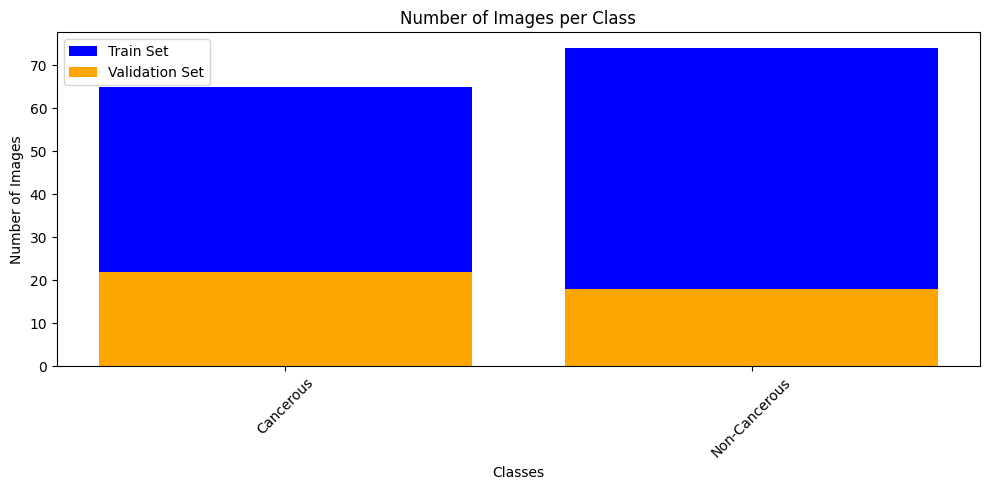

In [ ]:
import os
import matplotlib.pyplot as plt

def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            count = 0
            for root, dirs, files in os.walk(class_dir):
                for file in files:
                    if file.endswith(('.jpg', '.jpeg', '.png')):  # Add more extensions if needed
                        count += 1
            class_counts[class_name] = count
    return class_counts

new_dataset_dir = 'neuro_140_final/braindata'
classes_train = count_images_per_class(os.path.join(new_dataset_dir, 'train'))
classes_val = count_images_per_class(os.path.join(new_dataset_dir, 'val'))

# Create lists to store class names and counts
class_names_train = ["Cancerous", "Non-Cancerous"]
class_counts_train = list(classes_train.values())

class_names_val = ["Cancerous", "Non-Cancerous"]
class_counts_val = list(classes_val.values())

# Plotting
plt.figure(figsize=(10, 5))

plt.bar(class_names_train, class_counts_train, color='blue', label='Train Set')
plt.bar(class_names_val, class_counts_val, color='orange', label='Validation Set')

plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


# def print_file_tree(directory, indent=''):
#     print(indent + os.path.basename(directory) + '/')
#     indent += '    '
#     for item in os.listdir(directory):
#         item_path = os.path.join(directory, item)
#         if os.path.isdir(item_path):
#             print_file_tree(item_path, indent)
#         else:
#             print(indent + item)

# print_file_tree(new_dataset_dir)



In [ ]:
### DEFINE OUR CUSTOM DATASET IN A WAY COMPATIBLE WITH THE ROBUSTNESS LIB ###

# Note that most of this code is dedicated to defining the transforms inside __init__.
# Another more flexible but more complex strategy can be seen in robustness/datasets.py

import torch as ch
from torchvision import transforms
from robustness.datasets import DataSet
from robustness import imagenet_models
from robustness.data_augmentation import Lighting, IMAGENET_PCA

# Define your custom dataset class
class BrainDatasetRobust(DataSet):
  def __init__(self, data_path='neuro_140_final/braindata'):

    #### Standard ImageNet transforms ####
    # IMPORTANT: these may or may not make sense for your dataset. for example,
    # check out the default parameters of RandomResizedCrop: https://pytorch.org/vision/main/generated/torchvision.transforms.RandomResizedCrop.html
    transform_train = transforms.Compose([
      transforms.RandomResizedCrop(224),
      transforms.RandomHorizontalFlip(),
      transforms.ColorJitter(
        brightness=0.1,
        contrast=0.1,
        saturation=0.1
      ),
      transforms.ToTensor(),
      Lighting(0.05, IMAGENET_PCA['eigval'], IMAGENET_PCA['eigvec'])
    ])

    transform_test = transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
    ])
    ############

    super(BrainDatasetRobust, self).__init__(
      'brain_data', data_path, num_classes=2,
      mean=ch.tensor([0.485, 0.456, 0.406]),
      std=ch.tensor([0.229, 0.224, 0.225]),
      custom_class=None, label_mapping=None,
      transform_train=transform_train, transform_test=transform_test
    )

  def get_model(self, arch, pretrained=False):
    return imagenet_models.__dict__[arch](num_classes=self.num_classes, pretrained=pretrained)

  def find_classes(dataset_dir):
      classes = set()
      for phase in ['train', 'val']:
          phase_dir = os.path.join(dataset_dir, phase)
          for class_label in os.listdir(phase_dir):
              if os.path.isdir(os.path.join(phase_dir, class_label)):
                  classes.add(class_label)
      return classes

  # Call the function to find classes
  classes = find_classes(new_dataset_dir)
  print("Classes:", classes)




Classes: {'no', 'yes'}


Download some pretrained, robustified model weights for ResNet50:

In [ ]:
!wget https://www.dropbox.com/s/knf4uimlqsi1yz8/imagenet_l2_3_0.pt

--2024-04-25 02:12:07--  https://www.dropbox.com/s/knf4uimlqsi1yz8/imagenet_l2_3_0.pt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/knf4uimlqsi1yz8/imagenet_l2_3_0.pt [following]
--2024-04-25 02:12:09--  https://www.dropbox.com/s/raw/knf4uimlqsi1yz8/imagenet_l2_3_0.pt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucafdaf34e42a60c905545b43ddf.dl.dropboxusercontent.com/cd/0/inline/CRp05gTcKQ3ZEzf3GMSEBKNeXBkvIwZ1GmA-4PkpiegDRF6R8hP6xG75qUEBX9oJhmawPbCmx4EzkziG5aSKf304hmWHJH-TgHpiMm0qbUMkuEzLZdnHAbF7j9VwjYohKi_l1frHNq2F5xPnlY-ysLg-/file# [following]
--2024-04-25 02:12:10--  https://ucafdaf34e42a60c905545b43ddf.dl.dropboxusercontent.com/cd/0/inline/CRp05gTcKQ3ZEzf3GMSEBKNeXBkvIwZ1GmA-4PkpiegDRF6R8hP6xG75qUEBX9oJhmawPbCmx4EzkziG5

In [ ]:
# Copied more or less directly from https://robustness.readthedocs.io/en/latest/example_usage/training_lib_part_1.html

from robustness.datasets import DATASETS, ImageNet
from robustness.model_utils import make_and_restore_model
from robustness.train import train_model
from robustness.defaults import check_and_fill_args
from robustness.tools import constants, helpers
from robustness import defaults

from cox import utils
from cox import store

import torch as ch
from argparse import ArgumentParser
import os

/content/robustness/robustness/train.py:24: UserWarning: Could not import amp.
  warnings.warn('Could not import amp.')


In [ ]:
train_kwargs = {
    'dataset': BrainDatasetRobust,
    'arch': 'resnet50',
    'out_dir': "train_out",
    'lr': 0.01,
    'adv_train': 1,
    'constraint': '2',
    'eps': 3,
    'attack_lr': 1.5,
    'attack_steps': 20,
    'epochs': 5,
    'batch_size': 32,  # Possibly helpful specifically for adversarial training: set batch size as high as you can without running out of GPU memory
    'weight_decay': 1e-4,
    'step_lr': 50,
    'workers': 2,
}

# utils.Parameters is just an object wrapper for dicts implementing
# getattr and settattr
args = utils.Parameters(train_kwargs)

In [ ]:
# Fill in lots of default arguments. We often use the defaults for ImageNet.
# See robustness/defaults.py for more details.

assert args.dataset is not None, "Must provide a dataset"
ds_class_for_defaults = DATASETS['imagenet'] # Use ImageNet defaults for unspecified training args

args = check_and_fill_args(args, defaults.TRAINING_ARGS, ds_class_for_defaults)
if args.adv_train or args.adv_eval:
  args = check_and_fill_args(args, defaults.PGD_ARGS, ds_class_for_defaults)
args = check_and_fill_args(args, defaults.MODEL_LOADER_ARGS, ds_class_for_defaults)

In [ ]:
# Instantiate the dataset
ds = BrainDatasetRobust('neuro_140_final/braindata')

# Make the data loaders
train_loader, val_loader = ds.make_loaders(args.workers,
              args.batch_size, data_aug=bool(args.data_aug))

# Prefetches data to improve performance
train_loader = helpers.DataPrefetcher(train_loader)
val_loader = helpers.DataPrefetcher(val_loader)

# Get a "model" that is associated with the dataset. Note that this is "model"
# is a wrapper around some resnet50 object together with various functions that
# enable adversarial training
model, _ = make_and_restore_model(arch='resnet50', dataset=ImageNet("./"), resume_path='/content/robustness/imagenet_l2_3_0.pt')
model.model.fc = ch.nn.Linear(in_features=2048, out_features=ds.num_classes, bias=True)
model, _ = make_and_restore_model(arch=model.model, dataset=ds, add_custom_forward=True)

# If you want to start from a non-robust pretrained CNN: insert the following line BEFORE setting model.model.fc:
# model, _ = make_and_restore_model(arch='resnet50', dataset=ImageNet("./"), pytorch_pretrained=True)

# Use this version (instead of the above 3 lines of code) if you want to train from scratch (not recommended)
# model, _ = make_and_restore_model(arch='resnet50', dataset=ds)

==> Preparing dataset brain_data..
=> loading checkpoint '/content/robustness/imagenet_l2_3_0.pt'
=> loaded checkpoint '/content/robustness/imagenet_l2_3_0.pt' (epoch 105)


In [ ]:
# Create the cox store, and save the arguments in a table
my_store = store.Store(args.out_dir, args.exp_name)
args_dict = args.as_dict() if isinstance(args, utils.Parameters) else vars(args)
schema = store.schema_from_dict(args_dict)
my_store.add_table('metadata', schema)
my_store['metadata'].append_row(args_dict)

Logging in: /content/robustness/train_out/9868d646-61c0-4e82-854f-169566ded4a8


In [ ]:
# Train the model!
# Note that it evaluates on the "val" set twice for each epoch: once to get
# clean accuracy (NatPrec1), and once to get accuracy on adversarial examples (AdvPrec1)
# With the default 5 epochs at lr=0.01 on the Hymenoptera dataset, it tends to not learn anything -
# this is just intended as an example to show how to get a model training.

model = train_model(args, model, (train_loader, val_loader), store=my_store)

  0%|          | 0/7 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Train Epoch:0 | Loss 0.7816 | AdvPrec1 48.020 | AdvPrec5 100.000 | Reg term: 0.0 ||: 100%|██████████| 7/7 [00:28<00:00,  4.10s/it]
Val Epoch:0 | Loss 0.8990 | NatPrec1 39.216 | NatPrec5 100.000 | Reg term: 0.0 ||: 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]
Val Epoch:0 | Loss 1.1119 | AdvPrec1 39.216 | AdvPrec5 100.000 | Reg term: 0.0 ||: 100%|██████████| 2/2 [00:07<00:00,  4.00s/it]
  0%|          | 0/7 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Train Epoch:1 | Loss 0.8881 | AdvPrec1 51.042 | AdvPrec5 100.000 | Reg te

### Upon completion of the above code, you should have a new train_out directory inside the robustness directory. Inside it will be a new directory with a long name like "db6e372a-21e2-49b2-94b5-a306a764030c", within which will be several .pt files. These .pt files contain the weights for your trained model. checkpoint.pt.best is the model with the best accuracy, and checkpoint.pt.latest is the final model.  

# Testing the model's ability for targeted modulation
(for a more in-depth look at modulation techniques, see this notebook: https://colab.research.google.com/drive/1_4wK3uPBNDOaxX3pSdpgj2VseYgD4IOt?usp=sharing)

==> Preparing dataset brain_data..


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Current loss: 0.017931973561644554: 100%|██████████| 50/50 [00:03<00:00, 13.73it/s]


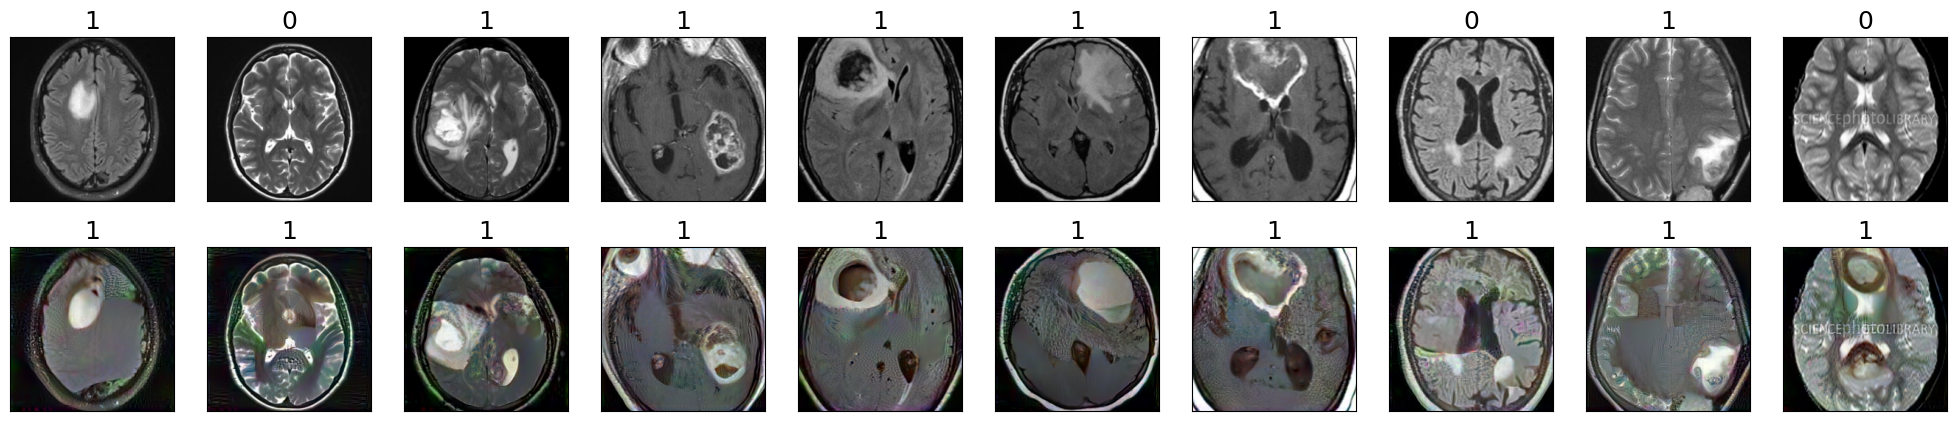

In [ ]:
from robustness.tools.vis_tools import show_image_row
from robustness.tools.label_maps import CLASS_DICT

ATTACK_EPS = 30
ATTACK_STEPSIZE = 0.5
ATTACK_STEPS = 50
NUM_WORKERS = 2
BATCH_SIZE = 10

kwargs = {
    'constraint':'2',
    'eps': ATTACK_EPS,
    'step_size': ATTACK_STEPSIZE,
    'iterations': ATTACK_STEPS,
    'targeted': True,
    'do_tqdm': True
}

train_loader, val_loader = ds.make_loaders(NUM_WORKERS, BATCH_SIZE, data_aug=False)

device = ch.device("cuda" if ch.cuda.is_available() else "cpu")
_, (im, label) = next(enumerate(val_loader))
im = im.to(device)
label = label.to(device)

# Make everything look like class "1" (bees). Images that are already bees
# will be enhanced, while ant images will be made to look more like bees
target_class = 1
targ = target_class * ch.ones_like(label)

_, im_adv = model(im, targ, make_adv=True, **kwargs)

# Get predicted labels for adversarial examples
pred, _ = model(im_adv)
label_pred = ch.argmax(pred, dim=1)

# Visualize test set images, along with corresponding adversarial examples
show_image_row([im.cpu(), im_adv.cpu()],
         tlist=[[int(t) for t in l] for l in [label, label_pred]],
         fontsize=18,
         filename='./adversarial_example_CIFAR.png')

In [ ]:
import keras
import tensorflow as tf
import vis
import numpy as np

ModuleNotFoundError: No module named 'vis'

# Retinopathy


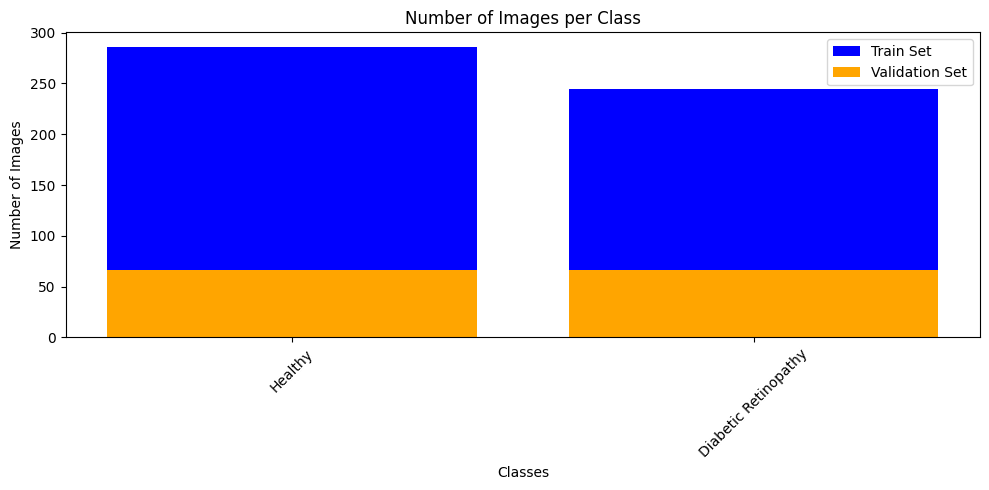

In [ ]:
import os
import matplotlib.pyplot as plt

def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            count = 0
            for root, dirs, files in os.walk(class_dir):
                for file in files:
                    if file.endswith(('.jpg', '.jpeg', '.png')):  # Add more extensions if needed
                        count += 1
            class_counts[class_name] = count
    return class_counts

new_dataset_dir = 'neuro_140_final/Retinopathy'
classes_train = count_images_per_class(os.path.join(new_dataset_dir, 'train'))
classes_val = count_images_per_class(os.path.join(new_dataset_dir, 'val'))

# Create lists to store class names and counts
class_names_train = ["Healthy", "Diabetic Retinopathy"]
class_counts_train = list(classes_train.values())

class_names_val = ["Healthy", "Diabetic Retinopathy"]
class_counts_val = list(classes_val.values())

# Plotting
plt.figure(figsize=(10, 5))

plt.bar(class_names_train, class_counts_train, color='blue', label='Train Set')
plt.bar(class_names_val, class_counts_val, color='orange', label='Validation Set')

plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


# def print_file_tree(directory, indent=''):
#     print(indent + os.path.basename(directory) + '/')
#     indent += '    '
#     for item in os.listdir(directory):
#         item_path = os.path.join(directory, item)
#         if os.path.isdir(item_path):
#             print_file_tree(item_path, indent)
#         else:
#             print(indent + item)

# print_file_tree(new_dataset_dir)



In [ ]:
### DEFINE OUR CUSTOM DATASET IN A WAY COMPATIBLE WITH THE ROBUSTNESS LIB ###

# Note that most of this code is dedicated to defining the transforms inside __init__.
# Another more flexible but more complex strategy can be seen in robustness/datasets.py

import torch as ch
from torchvision import transforms
from robustness.datasets import DataSet
from robustness import imagenet_models
from robustness.data_augmentation import Lighting, IMAGENET_PCA

# Define your custom dataset class
class RetinaDatasetRobust(DataSet):
  def __init__(self, data_path='neuro_140_final/Retinopathy'):

    #### Standard ImageNet transforms ####
    # IMPORTANT: these may or may not make sense for your dataset. for example,
    # check out the default parameters of RandomResizedCrop: https://pytorch.org/vision/main/generated/torchvision.transforms.RandomResizedCrop.html
    transform_train = transforms.Compose([
      transforms.RandomResizedCrop(224),
      transforms.RandomHorizontalFlip(),
      transforms.ColorJitter(
        brightness=0.1,
        contrast=0.1,
        saturation=0.1
      ),
      transforms.ToTensor(),
      Lighting(0.05, IMAGENET_PCA['eigval'], IMAGENET_PCA['eigvec'])
    ])

    transform_test = transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
    ])
    ############

    super(RetinaDatasetRobust, self).__init__(
      'retina_data', data_path, num_classes=2,
      mean=ch.tensor([0.485, 0.456, 0.406]),
      std=ch.tensor([0.229, 0.224, 0.225]),
      custom_class=None, label_mapping=None,
      transform_train=transform_train, transform_test=transform_test
    )

  def get_model(self, arch, pretrained=False):
    return imagenet_models.__dict__[arch](num_classes=self.num_classes, pretrained=pretrained)

  def find_classes(dataset_dir):
      classes = set()
      for phase in ['train', 'val']:
          phase_dir = os.path.join(dataset_dir, phase)
          for class_label in os.listdir(phase_dir):
              if os.path.isdir(os.path.join(phase_dir, class_label)):
                  classes.add(class_label)
      return classes

  # Call the function to find classes
  classes = find_classes(new_dataset_dir)
  print("Classes:", classes)




Classes: {'No_DR', 'DR'}


In [ ]:
# Instantiate the dataset
ds = RetinaDatasetRobust('neuro_140_final/Retinopathy')

# Make the data loaders
train_loader, val_loader = ds.make_loaders(args.workers,
              args.batch_size, data_aug=bool(args.data_aug))

# Prefetches data to improve performance
train_loader = helpers.DataPrefetcher(train_loader)
val_loader = helpers.DataPrefetcher(val_loader)

# Get a "model" that is associated with the dataset. Note that this is "model"
# is a wrapper around some resnet50 object together with various functions that
# enable adversarial training
model, _ = make_and_restore_model(arch='resnet50', dataset=ImageNet("./"), resume_path='/content/robustness/imagenet_l2_3_0.pt')
model.model.fc = ch.nn.Linear(in_features=2048, out_features=ds.num_classes, bias=True)
model, _ = make_and_restore_model(arch=model.model, dataset=ds, add_custom_forward=True)

# If you want to start from a non-robust pretrained CNN: insert the following line BEFORE setting model.model.fc:
# model, _ = make_and_restore_model(arch='resnet50', dataset=ImageNet("./"), pytorch_pretrained=True)

# Use this version (instead of the above 3 lines of code) if you want to train from scratch (not recommended)
# model, _ = make_and_restore_model(arch='resnet50', dataset=ds)

==> Preparing dataset retina_data..
=> loading checkpoint '/content/robustness/imagenet_l2_3_0.pt'
=> loaded checkpoint '/content/robustness/imagenet_l2_3_0.pt' (epoch 105)


In [ ]:
# Create the cox store, and save the arguments in a table
my_store = store.Store(args.out_dir, args.exp_name)
args_dict = args.as_dict() if isinstance(args, utils.Parameters) else vars(args)
schema = store.schema_from_dict(args_dict)
my_store.add_table('metadata', schema)
my_store['metadata'].append_row(args_dict)

Logging in: /content/robustness/train_out/400d7dcd-03b9-4a1a-83b2-6ce7123d7084


In [ ]:
# Train the model!
# Note that it evaluates on the "val" set twice for each epoch: once to get
# clean accuracy (NatPrec1), and once to get accuracy on adversarial examples (AdvPrec1)
# With the default 5 epochs at lr=0.01 on the Hymenoptera dataset, it tends to not learn anything -
# this is just intended as an example to show how to get a model training.

model = train_model(args, model, (train_loader, val_loader), store=my_store)

  0%|          | 0/17 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Train Epoch:0 | Loss 0.8144 | AdvPrec1 40.039 | AdvPrec5 100.000 | Reg term: 0.0 ||:  94%|█████████▍| 16/17 [01:17<00:04,  4.67s/it]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Train Epoch:0 | Loss 0.8135 | AdvPrec1 40.113 | AdvPrec5 100.000 | Reg term: 0.0 ||: 100%|██████████| 17/17 [01:20<00:00,  4.73s/it]
Val Epoch:0 | Loss 0.3238 | NatPrec1 89.394 | NatPrec5 100.000 | Reg term: 0.0 ||: 100%|██████████| 5/5 [00:00<00:00,  6.29it/s]
Val Epoch:0 | Loss 0.7098 | AdvPrec1 62.879 | AdvPrec5 100.000 | Reg term: 0.0 ||: 100%|██████████| 5/5 

==> Preparing dataset retina_data..


Current loss: 0.10624817758798599: 100%|██████████| 50/50 [00:03<00:00, 13.52it/s]


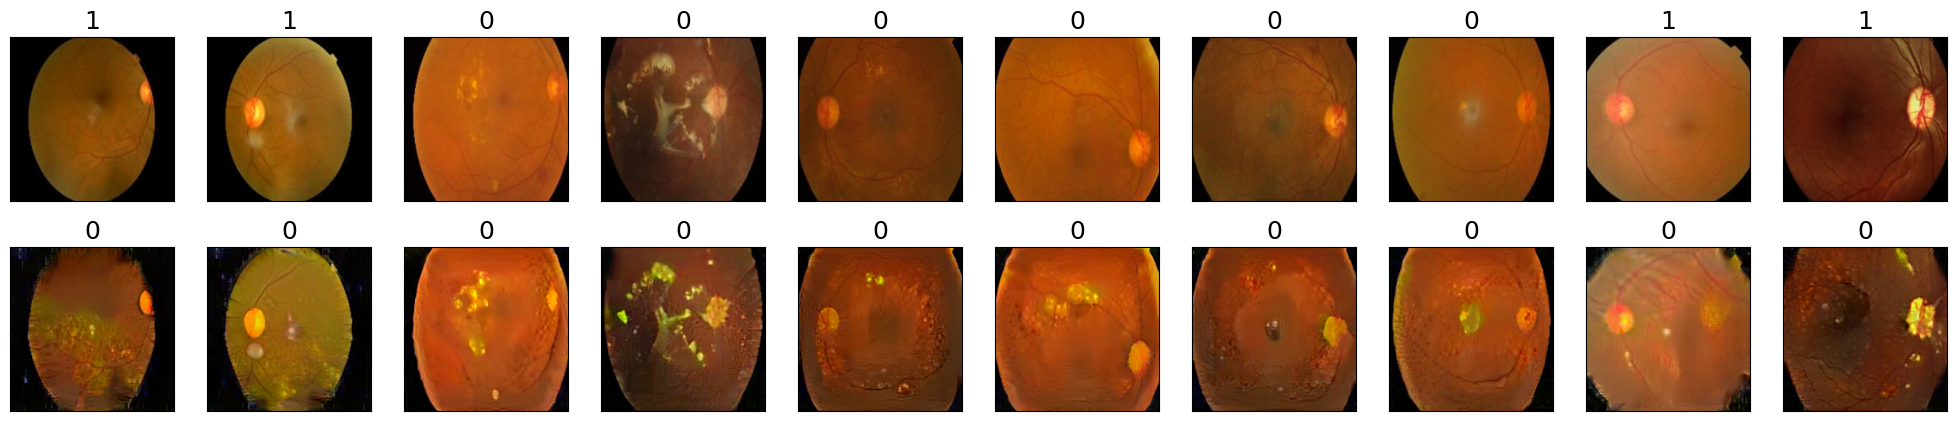

In [ ]:
from robustness.tools.vis_tools import show_image_row
from robustness.tools.label_maps import CLASS_DICT

ATTACK_EPS = 30
ATTACK_STEPSIZE = 0.5
ATTACK_STEPS = 50
NUM_WORKERS = 2
BATCH_SIZE = 10

kwargs = {
    'constraint':'2',
    'eps': ATTACK_EPS,
    'step_size': ATTACK_STEPSIZE,
    'iterations': ATTACK_STEPS,
    'targeted': True,
    'do_tqdm': True
}

train_loader, val_loader = ds.make_loaders(NUM_WORKERS, BATCH_SIZE, data_aug=False)

device = ch.device("cuda" if ch.cuda.is_available() else "cpu")
_, (im, label) = next(enumerate(val_loader))
im = im.to(device)
label = label.to(device)

# Make everything look like class "1" (bees). Images that are already bees
# will be enhanced, while ant images will be made to look more like bees
target_class = 0
targ = target_class * ch.ones_like(label)

_, im_adv = model(im, targ, make_adv=True, **kwargs)

# Get predicted labels for adversarial examples
pred, _ = model(im_adv)
label_pred = ch.argmax(pred, dim=1)

# Visualize test set images, along with corresponding adversarial examples
show_image_row([im.cpu(), im_adv.cpu()],
         tlist=[[int(t) for t in l] for l in [label, label_pred]],
         fontsize=18,
         filename='./adversarial_example_CIFAR.png')

# Grad Cam

In [ ]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50
from PIL import Image

image = np.array(Image.open("/content/robustness/neuro_140_final/braindata/train/no/11 no.jpg"))

model = resnet50(pretrained=True)
target_layers = [model.layer4[-1]]
rgb_img = np.float32(image) / 255
input_tensor = preprocess_image(rgb_img,
                                mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])

# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers)

# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...

# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.

targets = None

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

In [ ]:
Image.fromarray(visualization)
